In [135]:
import pandas as pd

In [136]:
df = pd.read_csv('./train.csv')
print(df.shape)
df.head()

(3000, 23)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


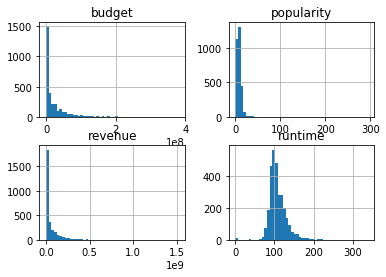

In [137]:
import matplotlib.pyplot as plt
df[['budget','runtime','revenue','popularity']].hist(bins=50);
plt.show()

In [138]:
df['budget_cat'] = pd.cut(df['budget'],[0,30000000,80000000,5000000000],labels=['low','medium','high'])

In [139]:
# make NaN cateogry, fill it in
df['budget_cat'] = df['budget_cat'].cat.add_categories('unknown')
df['budget_cat'].fillna('unknown',inplace=True)

df['budget_cat'].value_counts()

low        1505
unknown     812
medium      487
high        196
Name: budget_cat, dtype: int64

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=14)

for train_index, test_index in split.split(df, df['budget_cat']):
    train = df.loc[train_index]
    test = df.loc[test_index]

print('Original data budget proportions:', df['budget_cat'].value_counts()/len(df),'',
      'Stratified training set budget proportions:',train['budget_cat'].value_counts()/len(train),
      sep = '\n'
     )

Original data budget proportions:
low        0.501667
unknown    0.270667
medium     0.162333
high       0.065333
Name: budget_cat, dtype: float64

Stratified training set budget proportions:
low        0.501667
unknown    0.270417
medium     0.162500
high       0.065417
Name: budget_cat, dtype: float64


In [7]:
for dataset in [train,test]:
    dataset.drop(['budget_cat'],axis=1,inplace=True)

3. Brief data exploration¶
Look for data structure, null values, distributions, outliers, and complexity of categorical variables.

Note: only visualize on the training data.

In [8]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [9]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2545,2546,NaN,45000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.patriotsdayfilm.com/,tt4572514,en,Patriots Day,An account of Boston Police Commissioner Ed Da...,14.547939,...,12/12/16,133.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,The inside story of the world's greatest manhunt.,Patriots Day,"[{'id': 1680, 'name': 'boston'}, {'id': 1700, ...","[{'cast_id': 4, 'character': 'Sgt. Tommy Saund...","[{'credit_id': '587cad3bc3a3684a9e01776f', 'de...",50548152
2415,2416,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0106387,en,Benny & Joon,A mentally ill young woman finds her love in a...,10.597116,...,4/16/93,98.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A romance on the brink of reality.,Benny & Joon,"[{'id': 1155, 'name': 'brother sister relation...","[{'cast_id': 2, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe43adc3a36847f8066f63', 'de...",23202734
1919,1920,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,tt0458367,en,Right at Your Door,"A dirty bomb goes off in Los Angeles, jamming ...",4.010441,...,1/23/06,96.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Right at Your Door,"[{'id': 4458, 'name': 'post-apocalyptic'}]","[{'cast_id': 3, 'character': 'Lexi', 'credit_i...","[{'credit_id': '52fe46709251416c75078597', 'de...",2043704
1462,1463,NaN,8000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://focusfeatures.com/its_kind_of_a_funny_s...,tt0804497,en,It's Kind of a Funny Story,A clinically depressed teenager gets a new sta...,8.172013,...,7/6/10,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sometimes what's in your head isn't as crazy a...,It's Kind of a Funny Story,"[{'id': 236, 'name': 'suicide'}, {'id': 894, '...","[{'cast_id': 11, 'character': 'Craig Gilner', ...","[{'credit_id': '567f355792514132db008f84', 'de...",6491240
220,221,NaN,12000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.cityoflifeanddeath.co.uk/,tt1124052,zh,南京!南京!,"City of Life and Death takes place in 1937, du...",7.216103,...,4/22/09,132.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,City of Life and Death,"[{'id': 1327, 'name': 'war crimes'}, {'id': 15...","[{'cast_id': 1, 'character': 'Lu Jianxiong', '...","[{'credit_id': '53afe79a0e0a265975005fda', 'de...",10652498


In [10]:
#Find missing values
train.isnull().sum().sort_values(ascending=False)

belongs_to_collection    1939
homepage                 1637
tagline                   478
Keywords                  228
production_companies      129
production_countries       46
spoken_languages           18
crew                       10
cast                        9
overview                    8
genres                      4
runtime                     2
poster_path                 1
original_language           0
budget                      0
imdb_id                     0
revenue                     0
original_title              0
popularity                  0
release_date                0
status                      0
title                       0
id                          0
dtype: int64

In [11]:
train['original_language'].value_counts()

en    2067
fr      58
hi      37
ru      36
es      36
ja      30
it      18
cn      16
ko      15
de      14
zh      13
ta      12
sv       8
fa       5
nl       4
ro       4
da       3
pt       3
fi       2
tr       2
ml       2
hu       2
te       2
pl       2
no       1
he       1
nb       1
mr       1
ur       1
id       1
vi       1
ar       1
cs       1
Name: original_language, dtype: int64

/home/sai/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/sai/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


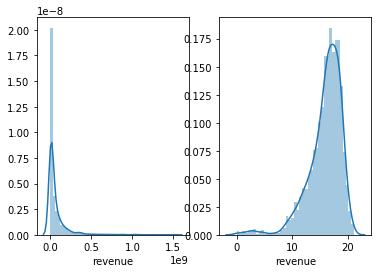

In [141]:
import seaborn as sns
import numpy as np
fig,ax  =  plt.subplots(1,2,sharey=False)

sns.distplot(train['revenue'],ax=ax[0]);
sns.distplot(np.log(train['revenue']),ax=ax[1]);

In [13]:
corr_matrix = train.drop('id',axis=1).corr()
corr_matrix['revenue'].sort_values(ascending=False)

#Budget and runtime are both very strongly correlated with revenue, popularity is expected.

revenue       1.000000
budget        0.743399
popularity    0.469439
runtime       0.195318
Name: revenue, dtype: float64

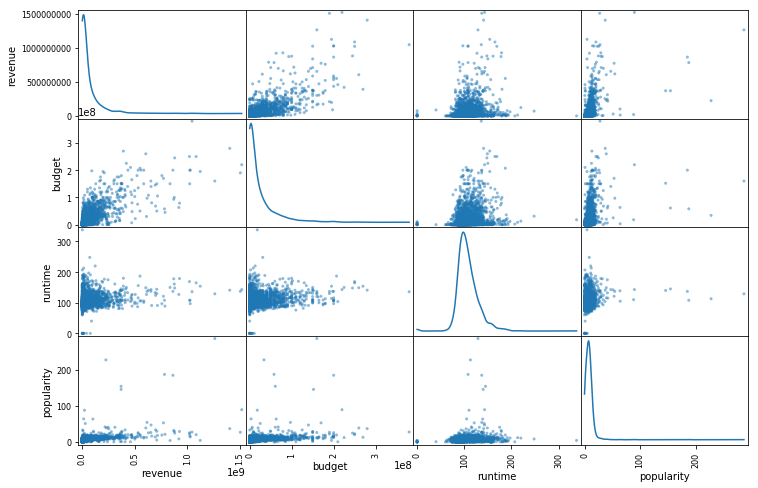

In [14]:
from pandas.plotting import scatter_matrix

attributes = ['revenue','budget','runtime','popularity']
scatter_matrix(train[attributes],diagonal='kde',figsize=(12,8));

In [15]:
#Runtime: some movies have a runtime of 0
train.loc[train['runtime']==0,['title','runtime']]
#For some reason or another, this data is just missing. For example, 
#Tutto tutto niente niente is 96 min and Cry, Onion is 92 min. 
#These can be fixed with a few quick Google searches.

,title,runtime
2865,Tutto tutto niente niente,0.0
2498,Hooked on the Game 2. The Next Level,0.0
1874,Missing,0.0
591,А поутру они проснулись,0.0
2645,My Old Classmate,0.0
2785,Revelation,0.0
1255,"Cry, Onion!",0.0
1541,All at Once,0.0
390,The Worst Christmas of My Life,0.0
2150,Mechenosets,0.0


In [16]:
train.loc[train['runtime']==0,'runtime'] = [96,108,122,90,98,111,92,112,86,108,93]

In [17]:
df.loc[df['revenue'] < 100, ['title','revenue']].head()


,title,revenue
150,Windwalker,18
269,Glass: A Portrait of Philip in Twelve Parts,20
280,Bats,10
312,The Cookout,12
334,Saamy,3


In [18]:
#I'll use a pipeline to test datasets where I ignore rows under \$100, \$500, and \$1000 in revenue, and decide which preparation method to use through cross-validation.

#Popularity and revenue
#There's several very popular movies that seem to not generate that much revenue. Would be helpful to explore these.
#

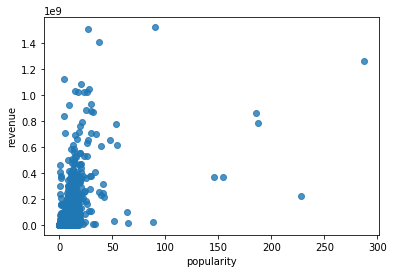

In [21]:
sns.regplot(x=train['popularity'], y = train['revenue'], fit_reg=False);

In [ ]:
!pip list | grep seaborn

In [ ]:
!pip install -U seaborn

In [25]:

train['revenue_to_budget'] = train['revenue']/(train['budget']+1)

train[['original_title',
       'popularity',
       'revenue_to_budget',
       'revenue',
       'budget']].sort_values('popularity',ascending=False).head(15)

train

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,revenue_to_budget
2545,2546,NaN,45000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.patriotsdayfilm.com/,tt4572514,en,Patriots Day,An account of Boston Police Commissioner Ed Da...,14.547939,...,133.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,The inside story of the world's greatest manhunt.,Patriots Day,"[{'id': 1680, 'name': 'boston'}, {'id': 1700, ...","[{'cast_id': 4, 'character': 'Sgt. Tommy Saund...","[{'credit_id': '587cad3bc3a3684a9e01776f', 'de...",50548152,1.123292e+00
2415,2416,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0106387,en,Benny & Joon,A mentally ill young woman finds her love in a...,10.597116,...,98.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A romance on the brink of reality.,Benny & Joon,"[{'id': 1155, 'name': 'brother sister relation...","[{'cast_id': 2, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe43adc3a36847f8066f63', 'de...",23202734,2.320273e+07
1919,1920,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,tt0458367,en,Right at Your Door,"A dirty bomb goes off in Los Angeles, jamming ...",4.010441,...,96.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Right at Your Door,"[{'id': 4458, 'name': 'post-apocalyptic'}]","[{'cast_id': 3, 'character': 'Lexi', 'credit_i...","[{'credit_id': '52fe46709251416c75078597', 'de...",2043704,2.043704e+06
1462,1463,NaN,8000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://focusfeatures.com/its_kind_of_a_funny_s...,tt0804497,en,It's Kind of a Funny Story,A clinically depressed teenager gets a new sta...,8.172013,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sometimes what's in your head isn't as crazy a...,It's Kind of a Funny Story,"[{'id': 236, 'name': 'suicide'}, {'id': 894, '...","[{'cast_id': 11, 'character': 'Craig Gilner', ...","[{'credit_id': '567f355792514132db008f84', 'de...",6491240,8.114049e-01
220,221,NaN,12000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.cityoflifeanddeath.co.uk/,tt1124052,zh,南京!南京!,"City of Life and Death takes place in 1937, du...",7.216103,...,132.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,City of Life and Death,"[{'id': 1327, 'name': 'war crimes'}, {'id': 15...","[{'cast_id': 1, 'character': 'Lu Jianxiong', '...","[{'credit_id': '53afe79a0e0a265975005fda', 'de...",10652498,8.877081e-01
378,379,NaN,35000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,tt0361089,en,Valiant,The animated comedy tells the story of a lowly...,11.836827,...,76.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Some pigeons eat crumbs, others make history.",Valiant,"[{'id': 10336, 'name': 'animation'}, {'id': 18...","[{'cast_id': 2, 'character': 'Valiant (voice)'...","[{'credit_id': '52fe45d49251416c75063f11', 'de...",19478106,5.565173e-01
750,751,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0332047,en,Fever Pitch,When relaxed and charming Ben Wrightman meets ...,6.734065,...,103.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Comedy About The Game of Love.,Fever Pitch,"[{'id': 1480, 'name': 'baseball'}, {'id': 3419...","[{'cast_id': 1, 'character': 'Lindsey Meeks', ...","[{'credit_id': '52fe443f9251416c7502df99', 'de...",50451307,1.681710e+00
2956,2957,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,tt0091055,en,Firewalker,A pair of adventurers try to track down an anc...,3.150899,...,104.0,"[{'iso_639_1': 'hu', 'name': 'Magyar'}, {'iso_...",Released,A pair of down-and-out fortune hunters cash in...,Firewalker,"[{'id': 352, 'name': 'secret passage'}, {'id':...","[{'cast_id': 1, 'character': 'Max Donigan', 'c...","[{'credit_id': '52fe45199251416c7504bbf7', 'de...",11949484,1.194948e+07
663,664,NaN,0,"[{'id': 27, 'n

Interestingly, Baby Driver did really well for its budget, making several multiples of its originally money. It seems as though popularity alone doesn't always serve as a great barometer for revenue. For example, The Circle, Fight Club, and The Shawshank Redemption didn't do super well. But maybe online popularity could act as a lever, affecting the multiple at which a movie earns back its budget.

I should probably figure out how popularity is determined. Next question: why do moderately popular movies end up making a lot of money?

In [26]:
train.loc[train['popularity']<100,
          ['original_title',
           'popularity',
           'revenue_to_budget',
           'revenue',
           'budget']].sort_values('revenue',ascending=False).head(10)

,original_title,popularity,revenue_to_budget,revenue,budget
1126,The Avengers,89.887648,6.907081,1519557910,220000000
1761,Furious 7,27.275687,7.927628,1506249360,190000000
2770,Avengers: Age of Ultron,37.379420,5.019299,1405403694,280000000
2322,Transformers: Dark of the Moon,4.503505,5.762805,1123746996,195000000
906,The Dark Knight Rises,20.582580,4.339756,1084939099,250000000
2135,Pirates of the Caribbean: On Stranger Tides,27.887720,2.751878,1045713802,380000000
2562,Finding Dory,14.477677,5.142854,1028570889,200000000
881,Alice in Wonderland,17.285093,5.127456,1025491110,200000000
734,Zootopia,26.024868,6.825228,1023784195,150000000
2532,The Hobbit: An Unexpected Journey,23.253089,4.084414,1021103568,250000000


#The movies that crushed despite pretty moderate popularity all benefited from extremely large budgets. Maybe TMDB popularity isn't all that important.

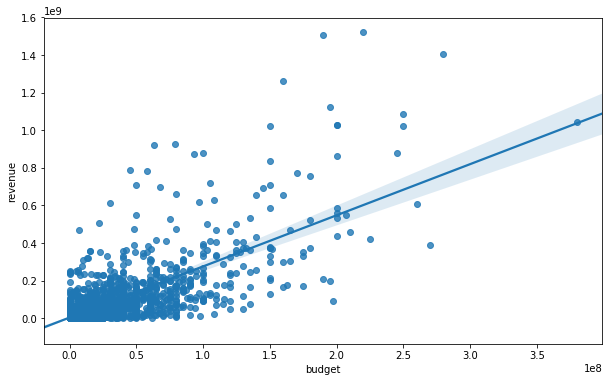

In [30]:
plt.figure(figsize=(10,6))
sns.regplot(x='budget',y='revenue',data=train);

In [33]:
train[['original_title','budget','revenue']].sort_values('budget',ascending=False).head(10)

,original_title,budget,revenue
2135,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
2770,Avengers: Age of Ultron,280000000,1405403694
1425,Superman Returns,270000000,391081192
1630,Transformers: The Last Knight,260000000,604942143
2532,The Hobbit: An Unexpected Journey,250000000,1021103568
906,The Dark Knight Rises,250000000,1084939099
2737,Spectre,245000000,880674609
1249,The Chronicles of Narnia: Prince Caspian,225000000,419651413
1126,The Avengers,220000000,1519557910
1880,X-Men: The Last Stand,210000000,459359555


A lot of the points are scattered towards the low end in terms of budget and revenue. There's a few movies that had really high budgets, but didn't end up generating too much revenue.

In [34]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,revenue_to_budget
2545,2546,NaN,45000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.patriotsdayfilm.com/,tt4572514,en,Patriots Day,An account of Boston Police Commissioner Ed Da...,14.547939,...,133.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,The inside story of the world's greatest manhunt.,Patriots Day,"[{'id': 1680, 'name': 'boston'}, {'id': 1700, ...","[{'cast_id': 4, 'character': 'Sgt. Tommy Saund...","[{'credit_id': '587cad3bc3a3684a9e01776f', 'de...",50548152,1.123292e+00
2415,2416,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0106387,en,Benny & Joon,A mentally ill young woman finds her love in a...,10.597116,...,98.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A romance on the brink of reality.,Benny & Joon,"[{'id': 1155, 'name': 'brother sister relation...","[{'cast_id': 2, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe43adc3a36847f8066f63', 'de...",23202734,2.320273e+07
1919,1920,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,tt0458367,en,Right at Your Door,"A dirty bomb goes off in Los Angeles, jamming ...",4.010441,...,96.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Right at Your Door,"[{'id': 4458, 'name': 'post-apocalyptic'}]","[{'cast_id': 3, 'character': 'Lexi', 'credit_i...","[{'credit_id': '52fe46709251416c75078597', 'de...",2043704,2.043704e+06
1462,1463,NaN,8000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://focusfeatures.com/its_kind_of_a_funny_s...,tt0804497,en,It's Kind of a Funny Story,A clinically depressed teenager gets a new sta...,8.172013,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sometimes what's in your head isn't as crazy a...,It's Kind of a Funny Story,"[{'id': 236, 'name': 'suicide'}, {'id': 894, '...","[{'cast_id': 11, 'character': 'Craig Gilner', ...","[{'credit_id': '567f355792514132db008f84', 'de...",6491240,8.114049e-01
220,221,NaN,12000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.cityoflifeanddeath.co.uk/,tt1124052,zh,南京!南京!,"City of Life and Death takes place in 1937, du...",7.216103,...,132.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,City of Life and Death,"[{'id': 1327, 'name': 'war crimes'}, {'id': 15...","[{'cast_id': 1, 'character': 'Lu Jianxiong', '...","[{'credit_id': '53afe79a0e0a265975005fda', 'de...",10652498,8.877081e-01


In [35]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'revenue_to_budget'],
      dtype='object')

In [36]:
print("Original date format:",train['release_date'][0])
train['release_date'] = pd.to_datetime(train['release_date'],format="%m/%d/%y")
test['release_date'] = pd.to_datetime(test['release_date'],format="%m/%d/%y")
print("New date format:",train['release_date'][0])

Original date format: 2/20/15
New date format: 2015-02-20 00:00:00


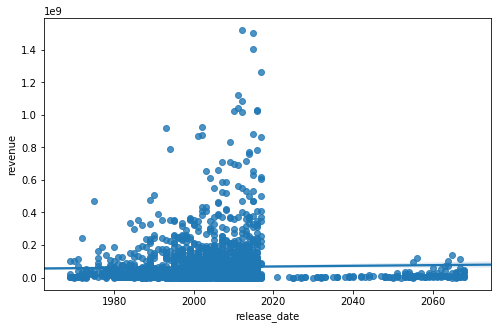

In [38]:
import seaborn as sns

plt.figure(figsize=(8,5));
sns.regplot(train['release_date'].dt.year,train['revenue']);

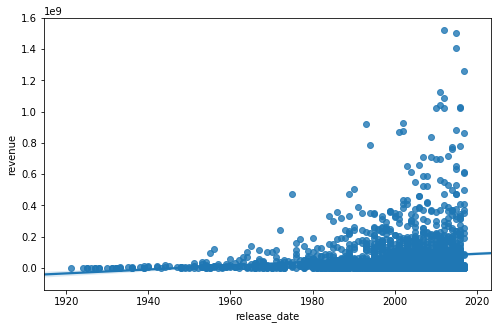

In [42]:
import datetime
# subtracts years for dates that haven't yet occurred
def subtract_years(dates, n_years, last_year = 2018):
    dates_copy = dates.copy()
    dates_copy[dates_copy.dt.year > last_year] = dates_copy[dates_copy.dt.year > 2019] \
                                                - datetime.timedelta(days = n_years*365.25)
    
    return dates_copy

# subtract 100 years
train['release_date'] = subtract_years(train['release_date'],100)
test['release_date'] = subtract_years(test['release_date'],100)

plt.figure(figsize=(8,5));
sns.regplot(train['release_date'].dt.year,train['revenue']);

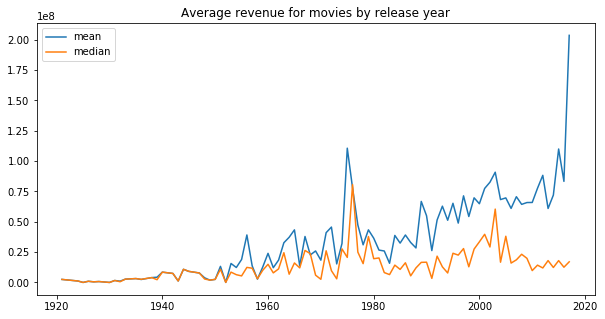

In [49]:
train['release_year'] = train['release_date'].dt.year
test['release_year'] = test['release_date'].dt.year

plt.figure(figsize=(10,5));
plt.plot(train[['release_year','revenue']].groupby('release_year').agg(['mean']));
plt.plot(train[['release_year','revenue']].groupby('release_year').agg(['median']));
plt.legend(['mean','median']);
plt.title('Average revenue for movies by release year');


While mean movie revenue increases each year (due to some probably extremely high budget films), the median revenue is relatively stable.

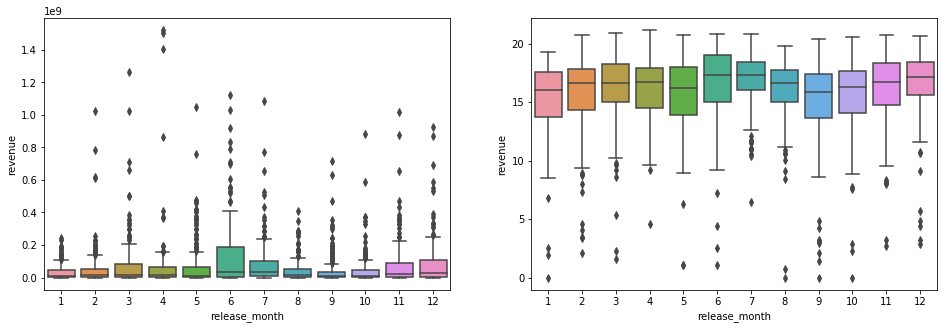

In [50]:
train['release_month'] = train['release_date'].dt.month
test['release_month'] = test['release_date'].dt.month

fig, ax = plt.subplots(1,2,figsize=(16,5),sharey=False)
sns.boxplot(train['release_month'],train['revenue'],ax=ax[0]);
sns.boxplot(train['release_month'],np.log(train['revenue']),ax=ax[1]);

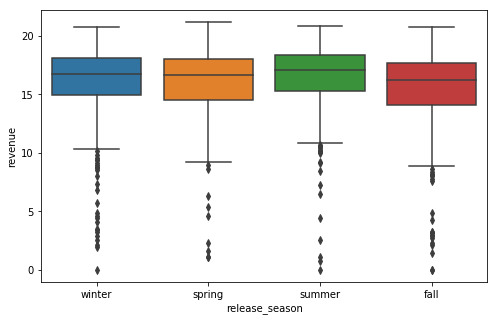

In [54]:
def get_season(dates):
    season = [1,1,2,2,2,3,3,3,4,4,4,1]
    
    season_map = {
        1:'winter',
        2:'spring',
        3:'summer',
        4:'fall'
    }
    
    return dates.dt.month.apply(lambda x: season_map[season[x - 1]])

train['release_season'] = get_season(train['release_date'])
test['release_season'] = get_season(test['release_date'])

plt.figure(figsize=(8,5));
sns.boxplot(train['release_season'],np.log(train['revenue']));


Movies appear to perform slightly better in summer than they do in the other months. Movies in fall also seem to perform worse. Based on this, I think I should make summer and fall into dummy columns (feature engineering step). I probably won't use the other seasons.

Summary of release_date findings:

Make dummies from season
Make dummies of summer and fall

When to use https://stackoverflow.com/questions/15197673/using-pythons-eval-vs-ast-literal-eval
    
datamap = eval(raw_input('Provide some data here: ')) means that you actually evaluate the code before you deem it to be unsafe or not. It evaluates the code as soon as the function is called. See also the dangers of eval.

ast.literal_eval raises an exception if the input isn't a valid Python datatype, so the code won't be executed if it's not.

Use ast.literal_eval whenever you need eval. You shouldn't usually evaluate literal Python statements.

In [70]:
from ast import literal_eval
from itertools import chain
from collections import Counter, OrderedDict
def get_vals(dict_list, key, fill='unknown'):
    vals = []
    #print("dict_list is ", dict_list)
    #print("key is ", key)
    for d in dict_list:
        val = d[key]

        if type(val) is str:
            vals.append(val.lower())
        else:
            vals.append(val)

    return vals 
   
def extract_vals(column, key, fill = 'unknown'):
    #print("column is ", column)
    column_copy = column.copy()
    
    
    if fill == 0:
        column_copy = column_copy.fillna(f"[{{'{key}':0}}]")
    else:
        column_copy = column_copy.fillna(f"[{{'{key}':'{fill}'}}]")
    #print("column_copy is ", column_copy)
    try: 
        column_copy_vals = column_copy.apply(literal_eval).apply(lambda x: get_vals(x,key))
        #print("column_copy_vals is ", column_copy_vals)
        return column_copy_vals
    ## if already extracted, don't extract again
    except ValueError:
        return column

def get_freq(column_vals, n_top = -1):
    column_vals_flat = list(chain(*column_vals))
    counter = Counter(column_vals_flat)
    
    if n_top == -1:
        return sorted(counter.items(), key = lambda item: -item[1])
    else:
        return sorted(counter.items(), key = lambda item: -item[1])[:n_top]

    
output = get_freq(extract_vals(train['belongs_to_collection'],'name'))

In [97]:
from collections import defaultdict
exp= extract_vals(train['belongs_to_collection'],'name')
#print(exp)
value_count_dict = defaultdict(int)
for x in exp:
    value_count_dict[x[0]]+= 1
    
def function(x):
    #print("printing x", x)
    return x[1]
print(sorted(value_count_dict.items(), key=function, reverse=True))

[('unknown', 1939), ('james bond collection', 14), ('pokémon collection', 5), ('friday the 13th collection', 5), ('the pink panther (original) collection', 4), ('rambo collection', 4), ('the fast and the furious collection', 4), ('transformers collection', 4), ('halloween collection', 3), ("child's play collection", 3), ('cars collection', 3), ('ice age collection', 3), ('the jaws collection', 3), ('[rec] collection', 3), ('rush hour collection', 3), ('resident evil collection', 3), ('missing in action collection', 3), ('qatsi collection', 2), ('diary of a wimpy kid collection', 2), ('dracula (hammer series)', 2), ('what the bleep! collection', 2), ('v/h/s collection', 2), ("national lampoon's vacation collection", 2), ('the expendables collection', 2), ('ted collection', 2), ('police academy collection', 2), ('pirates of the caribbean collection', 2), ('would i lie to you? collection', 2), ('asterix and obelix collection', 2), ('mexico trilogy', 2), ('percy jackson collection', 2), ('

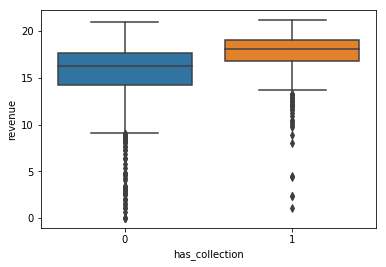

In [98]:
train['has_collection'] = [1 if 'unknown' not in x else 0 for x in extract_vals(train['belongs_to_collection'],'name')]
test['has_collection'] = [1 if 'unknown' not in x else 0  for x in extract_vals(test['belongs_to_collection'],'name')]

sns.boxplot(train['has_collection'], np.log(train['revenue']));

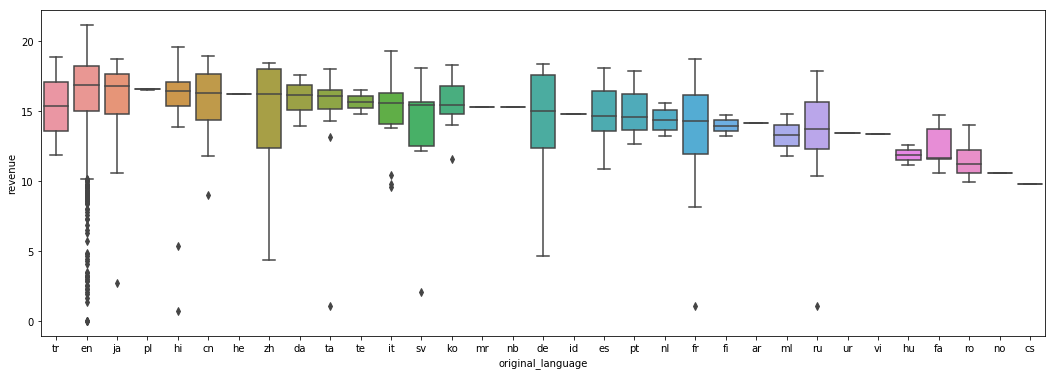

In [99]:
plt.figure(figsize=(18,6))

order = list(train[['original_language','revenue']].groupby('original_language').agg('median').sort_values('revenue',ascending=False)['revenue'].index)
sns.boxplot('original_language', np.log(train['revenue']), data=train, order = order);

TypeError: 'float' object is not iterable

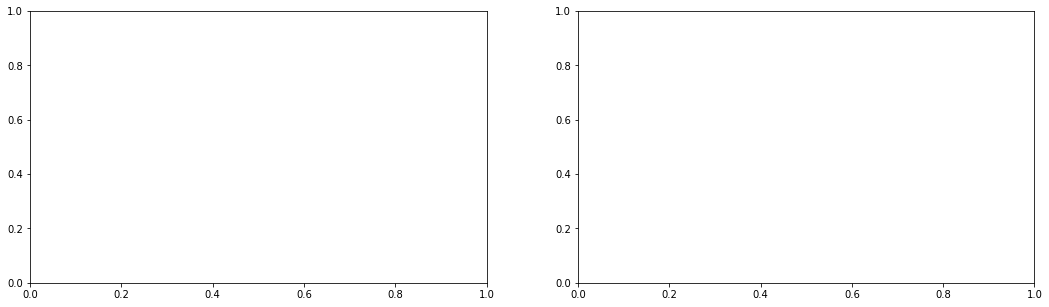

In [101]:
def rev_summary(df, col_name, top_n, sort = True):
    return_df = pd.DataFrame(columns=['group','revenue'])
    return_df['group'] = [x[0] for x in get_freq(df[col_name], top_n)]
    
    for i, g in enumerate(return_df['group']):
        has_g = [(g in x) for x in df[col_name]]
        av_revenue = np.mean(df.loc[has_g,'revenue'])
        return_df['revenue'].iloc[i] = av_revenue
        
    if sort:
        return_df.sort_values('revenue',ascending=False,inplace=True)
    
    return return_df

fig, ax = plt.subplots(1,2,figsize=(18,5),sharey=False)
genre_sum = rev_summary(train, 'genres', 15)
av_revenue = np.median(train['revenue'])

sns.barplot('revenue','group', data = genre_sum, ax = ax[0]);
sns.barplot(genre_sum['revenue']/av_revenue, genre_sum['group'], ax = ax[1])
ax[1].set_xlabel('revenue increase multiple');

In [59]:
train['belongs_to_collection']

2545                                                  NaN
2415                                                  NaN
1919                                                  NaN
1462                                                  NaN
220                                                   NaN
378                                                   NaN
750                                                   NaN
2956                                                  NaN
663                                                   NaN
2884                                                  NaN
497                                                   NaN
1298                                                  NaN
911                                                   NaN
2823                                                  NaN
613                                                   NaN
2432                                                  NaN
1463                                                  NaN
300     [{'id'


# Data pre-processing pipelines

In [102]:
to_drop = ['id', 'imdb_id', 'release_date', 'revenue', 'belongs_to_collection', 
           'cast', 'crew', 'homepage', 'poster_path', 'status',
           'original_title', 'overview', 'tagline', 'title']

X_train = train.drop(to_drop,axis=1)
X_train['budget'] = X_train['budget'].astype('float')
y_train = train['revenue']

X_test = test.drop(to_drop,axis=1)
X_test['budget'] = X_test['budget'].astype('float')
y_test = test['revenue']

X_train.dtypes

budget                  float64
genres                   object
original_language        object
popularity              float64
production_companies     object
production_countries     object
runtime                 float64
spoken_languages         object
Keywords                 object
revenue_to_budget       float64
release_year              int64
release_month             int64
release_season           object
has_collection            int64
dtype: object

In [ ]:
#We're dealing with continous, discrete, and categorical variables.


## Pipeline for continuous variables

In [103]:
X_train.select_dtypes('float').head()

,budget,popularity,runtime,revenue_to_budget
2545,45000000.0,14.547939,133.0,1.123292e+00
2415,0.0,10.597116,98.0,2.320273e+07
1919,0.0,4.010441,96.0,2.043704e+06
1462,8000000.0,8.172013,101.0,8.114049e-01
220,12000000.0,7.216103,132.0,8.877081e-01


In [107]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
cont_vars = list(X_train.select_dtypes(include = float).columns)

cont_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median'),
    PowerTransformer(method = 'yeo-johnson', standardize = False),
    StandardScaler()
)

# test to make sure the pipeline works
pd.DataFrame(cont_pipeline.fit_transform(train[cont_vars]), columns = cont_vars);

## Pipeline for discrete variables

In [109]:
disc_vars = list(X_train.select_dtypes(include = int).columns)

disc_pipeline = make_pipeline(
    SimpleImputer(strategy = 'constant', fill_value = -1)
)

pd.DataFrame(disc_pipeline.fit_transform(train[disc_vars]), columns = disc_vars);

In [110]:
X_train.select_dtypes(include = object)

,genres,original_language,production_companies,production_countries,spoken_languages,Keywords,release_season
2545,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",en,"[{'name': 'CBS Films', 'id': 5490}, {'name': '...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}, {'...","[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...","[{'id': 1680, 'name': 'boston'}, {'id': 1700, ...",winter
2415,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"[{'name': 'Roth-Arnold Productions', 'id': 156...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'id': 1155, 'name': 'brother sister relation...",spring
1919,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",en,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'id': 4458, 'name': 'post-apocalyptic'}]",winter
1462,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"[{'name': 'Focus Features', 'id': 10146}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 236, 'name': 'suicide'}, {'id': 894, '...",summer
220,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",zh,"[{'name': 'Media Asia Films', 'id': 5552}, {'n...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'id': 1327, 'name': 'war crimes'}, {'id': 15...",spring
378,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,"[{'name': 'Vanguard Films', 'id': 614}, {'name...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]","[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 10336, 'name': 'animation'}, {'id': 18...",spring
750,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"[{'name': 'Fox 2000 Pictures', 'id': 711}, {'n...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'id': 1480, 'name': 'baseball'}, {'id': 3419...",spring
2956,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,"[{'name': 'Cannon Group', 'id': 1444}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'hu', 'name': 'Magyar'}, {'iso_...","[{'id': 352, 'name': 'secret passage'}, {'id':...",fall
663,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,"[{'name': 'Alcon Entertainment', 'id': 1088}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 1618, 'name': 'radiation'}, {'id': 173...",spring
2884,"[{'id': 35, 'name': 'Comedy'}]",en,"[{'name': 'TriStar Pictures', 'id': 559}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'id': 572, 'name': 'sex'}, {'id': 5165, 'nam...",spring


In [113]:
X_train['original_language'].value_counts().index

Index(['en', 'fr', 'hi', 'ru', 'es', 'ja', 'it', 'cn', 'ko', 'de', 'zh', 'ta',
       'sv', 'fa', 'nl', 'ro', 'da', 'pt', 'fi', 'tr', 'ml', 'hu', 'te', 'pl',
       'no', 'he', 'nb', 'mr', 'ur', 'id', 'vi', 'ar', 'cs'],
      dtype='object')

In [115]:
cat_vars = ['original_language', 'release_season']

cat_pipeline = make_pipeline(
    SimpleImputer(strategy = 'constant', fill_value = 'unknown'),
    OneHotEncoder()
)

cat_pipeline.fit_transform(train[cat_vars]);
#cat_pipeline.named_steps['onehotencoder'].get_feature_names(['original_lang','release_season']);

## Pipeline for json variables¶
These are all the variables originally stored in (incorrect) json format.

In [130]:
json_vars = list(set(X_train.select_dtypes(include = object).columns) - set(cat_vars))
json_vars = json_vars.remove('genres')

In [131]:
train['genres'] = extract_vals(train['genres'],'name')
test['genres'] = extract_vals(test['genres'],'name')

get_freq(train['genres'],15)

train.loc[1755,'genres'] = ['unknown']
train.loc[1755,'n_genres'] = -1

In [133]:
from sklearn.base import BaseEstimator, TransformerMixin

class TopCatEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        #self.top_genres = []
        self.top_spoken_languages = []
        self.top_studios = []
        self.top_keywords = []
        self.top_cast_members = []
        self.top_crew_depts = []
        self.top_crew_jobs = []
        self.top_crew_members = []
        self.top_countries = []
        
        self.feature_names = []
        
    def get_feature_names(self):
        return self.feature_names
        
        
    ## extract top names from a column of name lists 
    def _get_top_names(self, column, top_n=10):
        elements = list(chain(*column))                                     
        top_elements = [t[0] for t in Counter(elements).most_common(top_n)]     
        return top_elements  
    
    
    def _make_columns(self, column, top_names, suffix = None):
        df = pd.DataFrame()

        
        if suffix is None:
                suffix = column
                            
        for n in top_names:
                df[f"{suffix}_{n}"] = [1 if n in n_list else 0 for n_list in column]
                
        return df
    
    def fit(self,X,y=None):
        #self.top_genres = self._get_top_names(X['genres'], 12)   
        self.top_spoken_languages = self._get_top_names(X['spoken_languages'], 20)
        self.top_studios = self._get_top_names(X['production_companies'], 20)
        self.top_countries = self._get_top_names(X['production_countries'], 15)
        self.top_keywords = self._get_top_names(X['Keywords'], 30)
        self.top_cast_members = self._get_top_names(X['cast_name'], 20)
        self.top_crew_depts = self._get_top_names(X['crew_department'], 20)
        self.top_crew_jobs = self._get_top_names(X['crew_job'], 20)
        self.top_crew_members = self._get_top_names(X['crew_name'], 20)
        
        return self
    
    def transform(self,X,y=None):
        
        frames = [#self._make_columns(X['genres'], self.top_genres, 'genre'),
                  self._make_columns(X['spoken_languages'], self.top_spoken_languages, 'spoken_language'),
                  self._make_columns(X['production_companies'], self.top_studios, 'prod_studio'),
                  self._make_columns(X['production_countries'], self.top_countries, 'prod_country'),
                  self._make_columns(X['Keywords'], self.top_keywords, 'keyword'),
                  self._make_columns(X['cast_name'], self.top_cast_members, 'cast_member'),
                  self._make_columns(X['crew_department'], self.top_crew_depts, 'crew_dpt'),
                  self._make_columns(X['crew_job'], self.top_crew_jobs, 'crew_job'),
                  self._make_columns(X['crew_name'], self.top_crew_members, 'crew_member')]
        
        return_df = pd.concat(frames,axis=1)
        
        self.feature_names = list(return_df.columns)
        return return_df
    
json_pipeline = make_pipeline(
    TopCatEncoder()
)

json_pipeline.fit_transform(X_train[json_vars]);
json_pipeline.named_steps['topcatencoder'].get_feature_names();

KeyError: None

In [142]:
preprocessor = ColumnTransformer(
    transformers = [
        ('continuous', cont_pipeline, cont_vars),
        ('discrete', disc_pipeline, disc_vars),
        ('categorical', cat_pipeline, cat_vars),
        ('json', json_pipeline, json_vars)
    ]
)

preprocessor.fit(X_train)

features = list(chain(cont_vars, 
                      disc_vars, 
                      cat_pipeline.named_steps['onehotencoder'].get_feature_names(['original_lang','release_season']),
                      json_pipeline.named_steps['topcatencoder'].get_feature_names()))

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed